# 남자배구-EDA(각 시즌 별 승률 1등팀 분석)

## 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

warnings.filterwarnings('ignore') # 경고 무시

## 데이터 불러오기

### 경기_시즌별 데이터 불러오기

In [2]:
남배_경기_시즌별 = pd.read_csv("./남배_경기_시즌별.csv", encoding='utf8')
남배_경기_시즌별

,시즌,팀명,총경기수,이긴경기,승률,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공
0,17-18,대한항공,43,28,65.116279,37.104663,24.010216,10.759218,0.000000,18.014340,14.624016,21.541644,0.181995,4.161725,5.482480,3.881402,0.964960
1,17-18,현대캐피탈,40,24,60.000000,35.721386,23.192199,12.615482,0.000000,19.348223,14.047771,22.443825,0.128494,3.750000,4.945783,3.605422,1.039157
2,17-18,삼성화재,39,20,51.282051,35.846243,29.596780,9.016017,1.977401,12.693870,11.831751,17.127175,0.102853,3.771186,5.245763,3.954802,1.144068
3,17-18,KB손해보험,36,19,52.777778,35.428796,25.892963,10.416667,0.000000,18.474414,12.859784,20.899136,0.189938,3.654321,4.629630,3.382716,0.888889
4,17-18,OK저축은행,36,10,27.777778,39.659695,28.561898,16.758712,0.677966,18.798746,13.675017,23.494237,0.151051,3.786441,5.179661,4.308475,0.915254
5,17-18,한국전력,36,16,44.444444,25.208148,17.518177,3.323846,0.284900,11.309915,8.685783,17.486182,0.113333,3.723647,4.393162,3.504274,0.814815
6,17-18,우리카드,36,16,44.444444,34.969277,22.432139,9.718886,0.301205,13.651325,13.476958,21.121807,0.145361,3.716867,5.192771,3.328313,0.756024
7,18-19,현대캐피탈,41,29,70.731707,34.383412,21.023018,7.349081,0.000000,18.316273,13.469291,23.098189,0.188845,3.396325,4.551181,3.561680,1.094488
8,18-19,대한항공,39,31,79.487179,39.392985,23.840985,5.846154,0.307692,20.002615,15.951815,22.981846,0.170400,4.569231,5.963077,4.569231,1.233846
9,18-19,우리카드,38,20,52.631579,31.039595,22.130723,7.996156,0.000000,16.638728,11.625289,19.471272,0.130289,3.621387,5.000000,3.135838,1.011561


### 시즌_선수별 데이터 불러오기

In [3]:
남배_시즌_선수별 = pd.read_csv("./남배_시즌별_선수데이터.csv", encoding='utf8')
남배_시즌_선수별

,Unnamed: 0,시즌,팀명,이름,포지션,결과,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,...,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,디그_성공률,세트_성공률,리시브_정확률,블로킹_성공률
0,0,17-18,KB손해보험,강영준,R,0,10.444444,18.666667,8.777778,2.222222,...,0.000000,0.151111,7.834444,0.333333,0.0,4.888889,53.174603,6.250000,10.714286,14.814815
1,1,17-18,KB손해보험,강영준,R,1,11.666667,19.666667,9.666667,3.166667,...,0.166667,0.320000,9.886667,0.333333,0.0,5.333333,72.685185,25.000000,22.666667,30.873016
2,2,17-18,KB손해보험,곽동혁,Li,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.062500,74.134442,26.741071,42.010112,0.000000
3,3,17-18,KB손해보험,곽동혁,Li,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.055556,85.314061,39.206349,46.390938,0.000000
4,4,17-18,KB손해보험,김진만,L,0,9.000000,14.000000,8.000000,0.000000,...,0.000000,0.330000,11.760000,0.000000,0.0,2.000000,80.000000,25.000000,28.571429,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,238,21-22,현대캐피탈,허수봉,L,1,20.166667,30.666667,18.166667,2.416667,...,0.416667,0.294167,12.337500,1.583333,0.0,5.666667,76.866994,24.444444,33.813548,14.484428
1209,239,21-22,현대캐피탈,홍동선,L,0,4.000000,8.000000,4.000000,2.000000,...,0.000000,0.000000,7.995000,1.000000,0.0,3.000000,100.000000,0.000000,46.666667,0.000000
1210,240,21-22,현대캐피탈,홍동선,L,1,8.000000,12.000000,8.000000,2.000000,...,1.000000,0.000000,4.350000,0.000000,0.0,2.000000,66.666667,0.000000,20.000000,0.000000
1211,241,21-22,현대캐피탈,히메네즈,R,0,16.000000,30.400000,15.400000,3.600000,...,0.200000,0.080000,9.450000,0.200000,0.0,4.400000,43.904762,37.500000,0.000000,2.666667


### 시즌_선수별 각 데이터 불러오기

In [4]:
남배_선수17 = pd.read_csv("./남배_선수17.csv", encoding='utf8')
남배_선수18 = pd.read_csv("./남배_선수18.csv", encoding='utf8')
남배_선수19 = pd.read_csv("./남배_선수19.csv", encoding='utf8')
남배_선수20 = pd.read_csv("./남배_선수20.csv", encoding='utf8')
남배_선수21 = pd.read_csv("./남배_선수21.csv", encoding='utf8')

In [18]:
남배_선수17["이름"] = 남배_선수17["이름"].str.cat(남배_선수17["포지션"])
남배_선수18["이름"] = 남배_선수18["이름"].str.cat(남배_선수18["포지션"])
남배_선수19["이름"] = 남배_선수19["이름"].str.cat(남배_선수19["포지션"])
남배_선수20["이름"] = 남배_선수20["이름"].str.cat(남배_선수20["포지션"])
남배_선수21["이름"] = 남배_선수21["이름"].str.cat(남배_선수21["포지션"])
남배_경기_시즌별.loc[남배_경기_시즌별['팀명'] == 'OK저축은행', '팀명'] = 'OK금융그룹'

## 경기_시즌별 팀별 승률 시각화
- 한국전력은 17~18시즌까지 하향세, 20시즌까지 상승, 21시즌에 다시 하락
- KB손해보험은 하락세를 보이다가 19시즌에 상승
- 우리카드는 19시즌까지 상승하고 20부터 하락중
- 대한항공은 20시즌까지 상승세를 계속 보이다가 21시즌에 하락
- 현대캐피탈은 18시즌부터 21시즌까지 하향
- 삼성화재는 20시즌까지 쭉 하향, 21시즌부터 상승
- OK금융그룹은 조금씩 쭉 상승

<AxesSubplot:xlabel='시즌', ylabel='승률'>

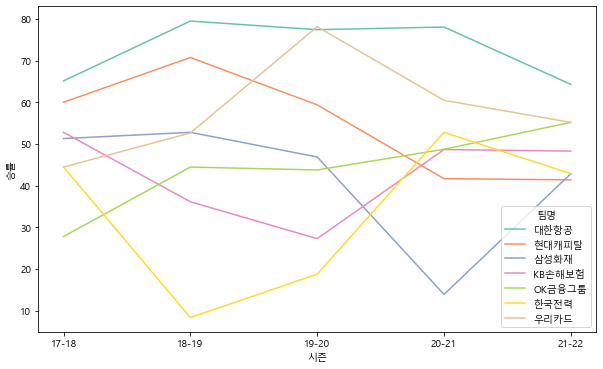

In [19]:
sns.lineplot(data=남배_경기_시즌별, y="승률", x="시즌", hue="팀명", palette='Set2')

<AxesSubplot:xlabel='시즌', ylabel='승률'>

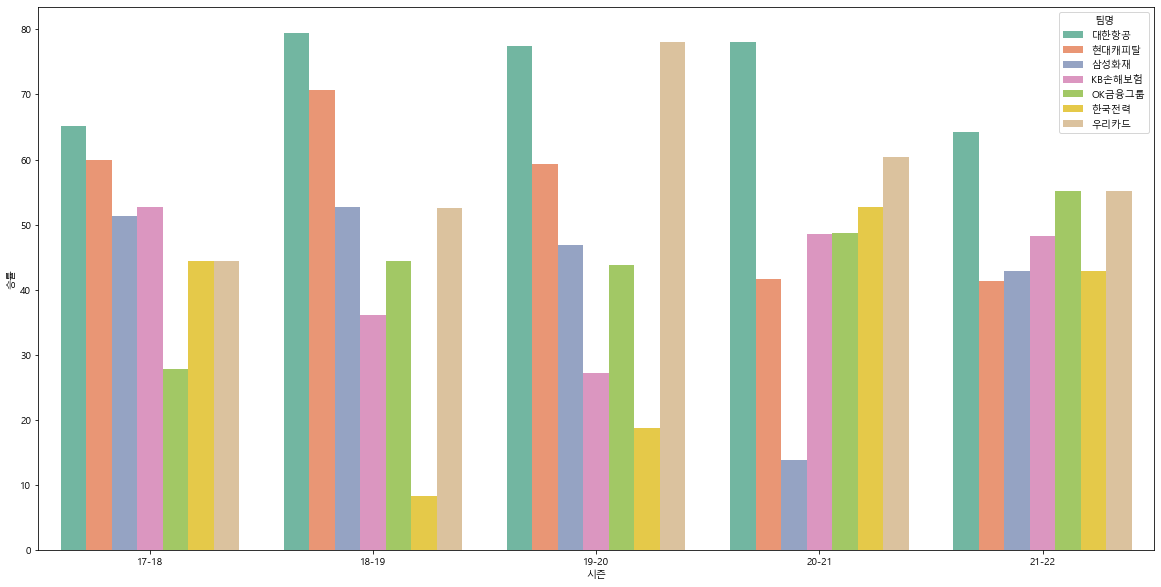

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data=남배_경기_시즌별, y="승률", x="시즌", hue="팀명", palette='Set2')

## 경기_시즌별 팀별 공격 종합 성공률 시각화
- 각 팀의 승률과 공격 종합 성공률은 비슷함

<AxesSubplot:xlabel='시즌', ylabel='공격종합_성공률'>

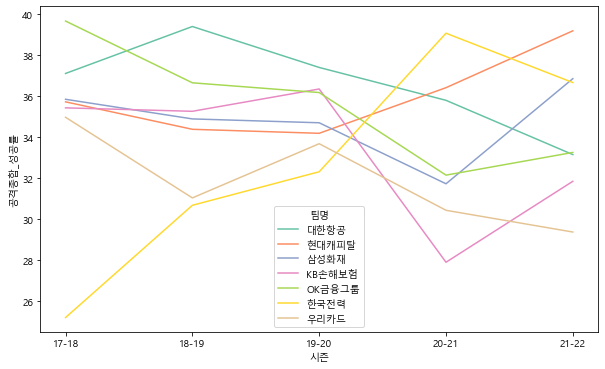

In [21]:
sns.lineplot(data=남배_경기_시즌별, y="공격종합_성공률", x="시즌", hue="팀명", palette='Set2')

<AxesSubplot:xlabel='시즌', ylabel='공격종합_성공률'>

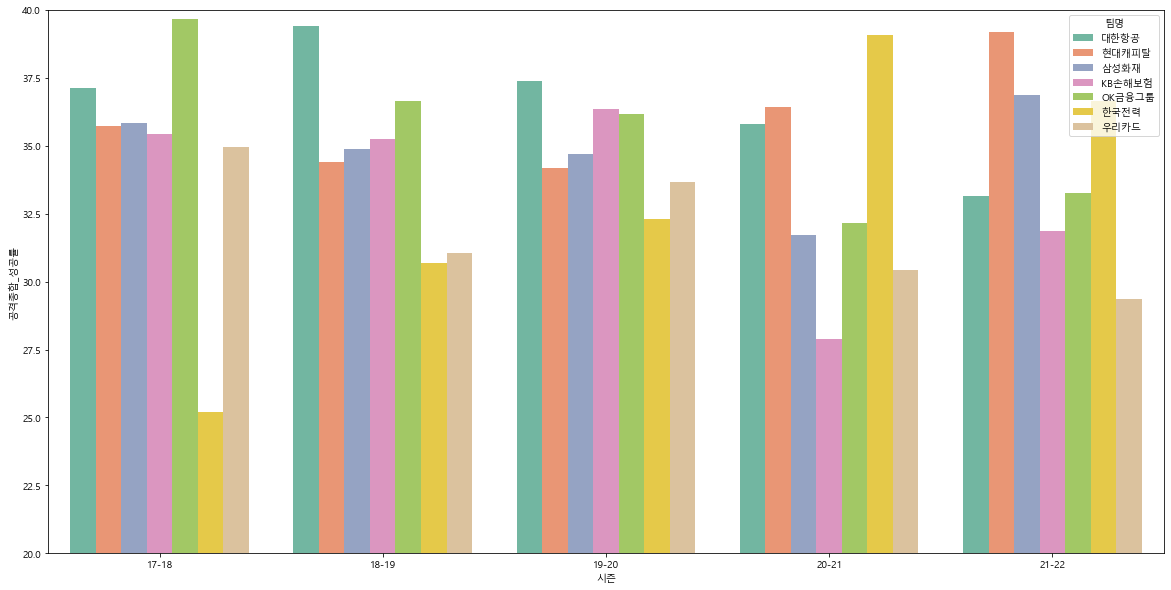

In [22]:
plt.figure(figsize=(20,10))
plt.ylim(20,40)
sns.barplot(data=남배_경기_시즌별, y="공격종합_성공률", x="시즌", hue="팀명", palette='Set2')

**17시즌에 승률이 1등이었던 대한항공이지만 공격종합성공률은 OK금융그룹이 제일 높음  
17시즌 OK금융그룹의 승률은 꼴등이었음 -> 공격시도 횟수가 다른 팀들보다 훨씬 적어서 성공률이 높게 나옴** 


- 18시즌 승률 1등은 대한항공, 공격종합성공률 1등 또한 대한항공
- 19시즌 승률 1등은 우리카드, 공격종합성공률 1등은 대한항공
- 20시즌 승률 1등은 대한항공, 공격종합성공률 1등은한국전력
- 21시즌 승률 1등은 대한항공, 공격종합성공률 1등은현대캐피탈

## 각 시즌 1등 팀의 각 선수들 시각화

### 17시즌 승률 1등 대한항공의 5시즌 승률 & 성공률 상관관계

Text(0, 0.5, '승률 및 성공률')

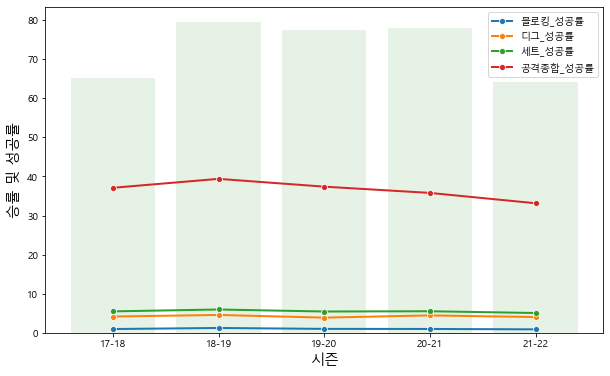

In [23]:
dh = 남배_경기_시즌별[남배_경기_시즌별["팀명"] == '대한항공']

plt.bar(dh["시즌"], dh["승률"],color='green',alpha=0.10)
sns.lineplot(data=dh, x="시즌" ,y="블로킹_성공",label="블로킹_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dh, x="시즌" ,y="디그_성공",label="디그_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dh, x="시즌" ,y="세트_성공",label="세트_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dh, x="시즌" ,y="공격종합_성공률",label="공격종합_성공률",marker='o',linewidth=2.0)


plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

### 17시즌 승률 1등 대한항공 각 선수들 시각화

#### 17시즌 승률 1등 대한항공 각 선수들의 득점 수
- 가스파리니 선수가 득점수가 제일 높음.
- 가스파리니 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

<Figure size 1440x720 with 0 Axes>

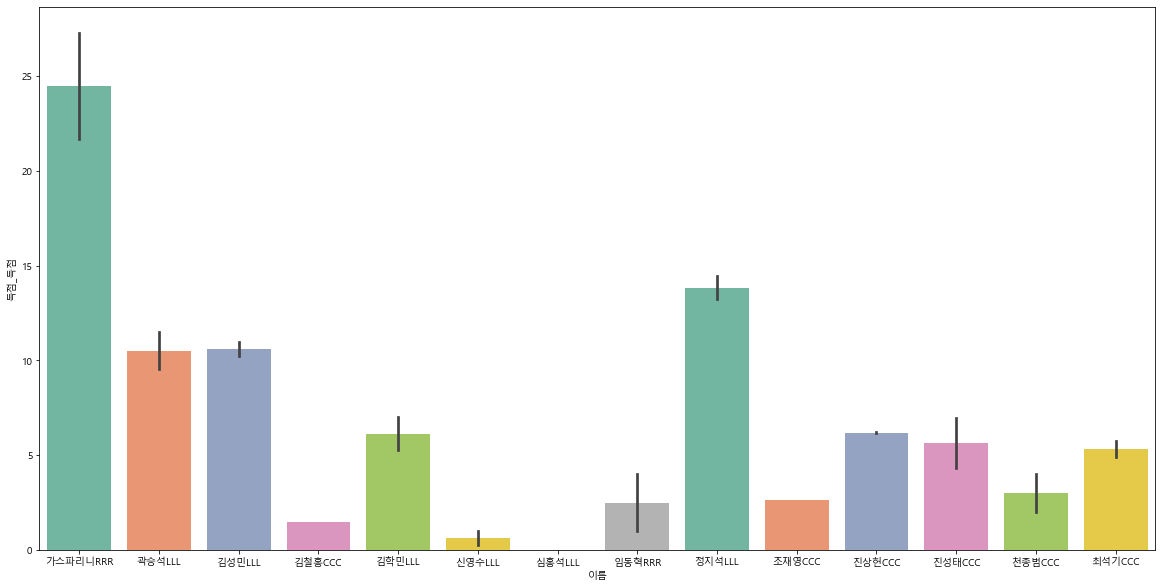

In [24]:
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))
data = 남배_선수17[남배_선수17["팀명"] == '대한항공']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data = data,
             y="득점_득점", 
             x="이름",
            palette='Set2'
            )

### 18시즌 승률 1등 대한항공 각 선수들 시각화

#### 18시즌 승률 1등 대한항공 각 선수들의 득점 수
- 가스파리니 선수가 득점수가 제일 높음.
- 가스파리니 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당
- 정지석(L) 선수도 득점수가 비등하게 높은 편

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

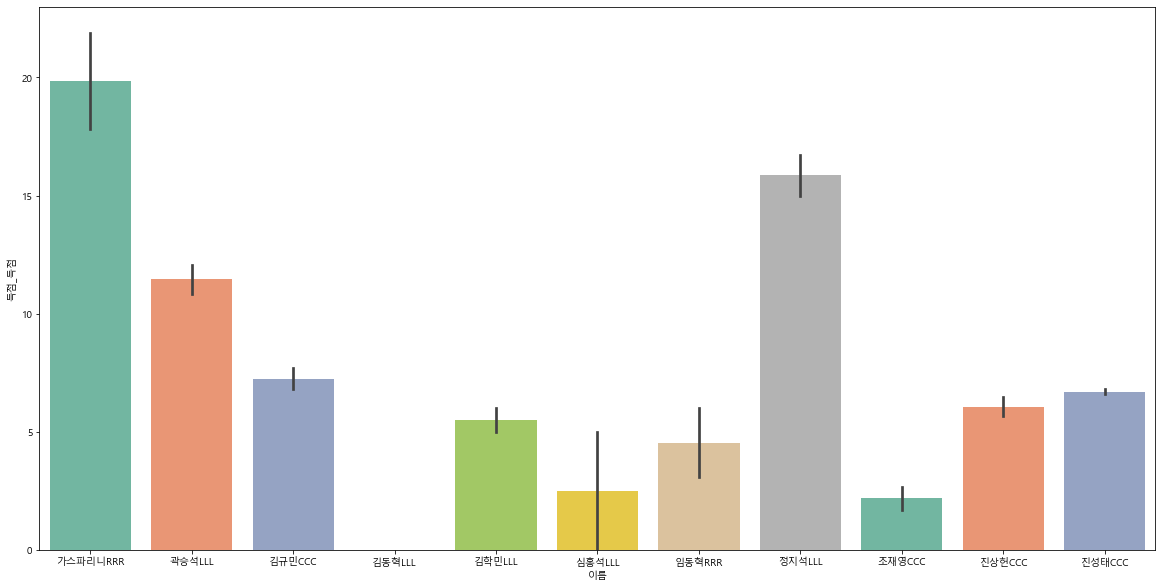

In [25]:
plt.figure(figsize=(20,10))
data=남배_선수18[남배_선수18["팀명"] == '대한항공']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름",
             palette='Set2'
            )

### 19시즌 승률 1등 우리카드의 5시즌 승률 & 성공률 상관관계

Text(0, 0.5, '승률 및 성공률')

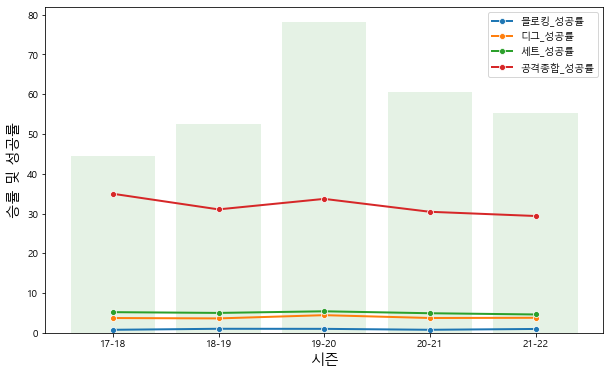

In [26]:
wr = 남배_경기_시즌별[남배_경기_시즌별["팀명"] == '우리카드']

plt.bar(wr["시즌"], wr["승률"],color='green',alpha=0.10)
sns.lineplot(data=wr, x="시즌" ,y="블로킹_성공",label="블로킹_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=wr, x="시즌" ,y="디그_성공",label="디그_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=wr, x="시즌" ,y="세트_성공",label="세트_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=wr, x="시즌" ,y="공격종합_성공률",label="공격종합_성공률",marker='o',linewidth=2.0)


plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

### 19시즌 승률 1등 우리카드 각 선수들 시각화

#### 19시즌 승률 1등 우리카드 각 선수들의 득점 수
- 펠리페 선수가 득점수가 제일 높음.
- 펠리페 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

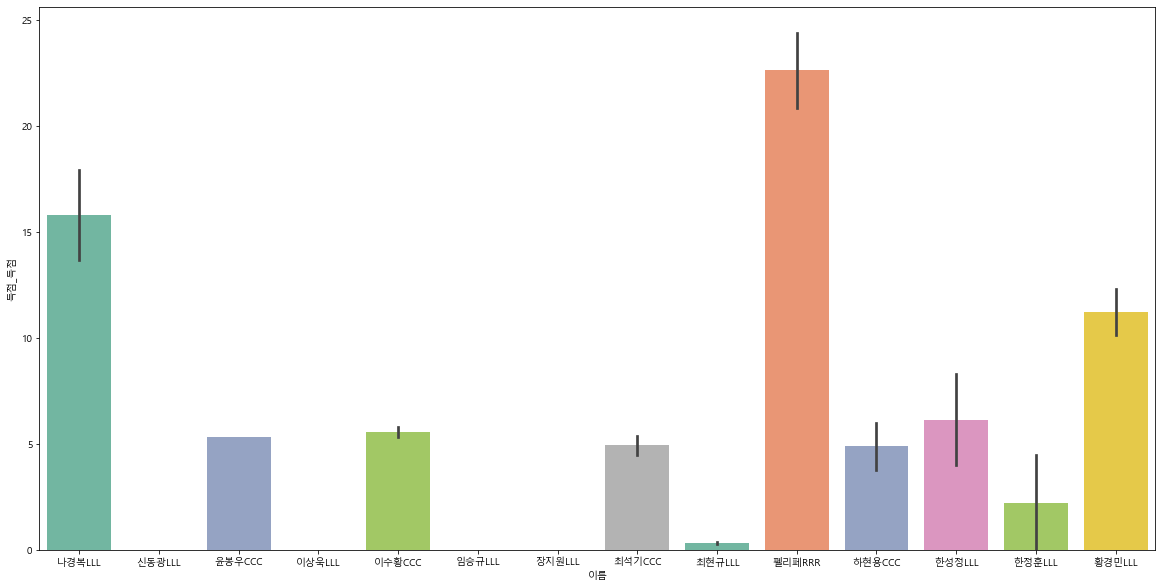

In [27]:
plt.figure(figsize=(20,10))
data=남배_선수19[남배_선수19["팀명"] == '우리카드']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

### 20시즌 승률 1등 대한항공 각 선수들 시각화

#### 20시즌 승률 1등 대한항공 각 선수들의 득점 수
- 요스바니 선수가 득점수가 제일 높음.
- 요스바니 선수는 용병임(외국인 선수) - Light 포지션을 맡았으며 주 공격 담당
- 그 다음 득점 수는 비예나 선수가 높음
- 비예나 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

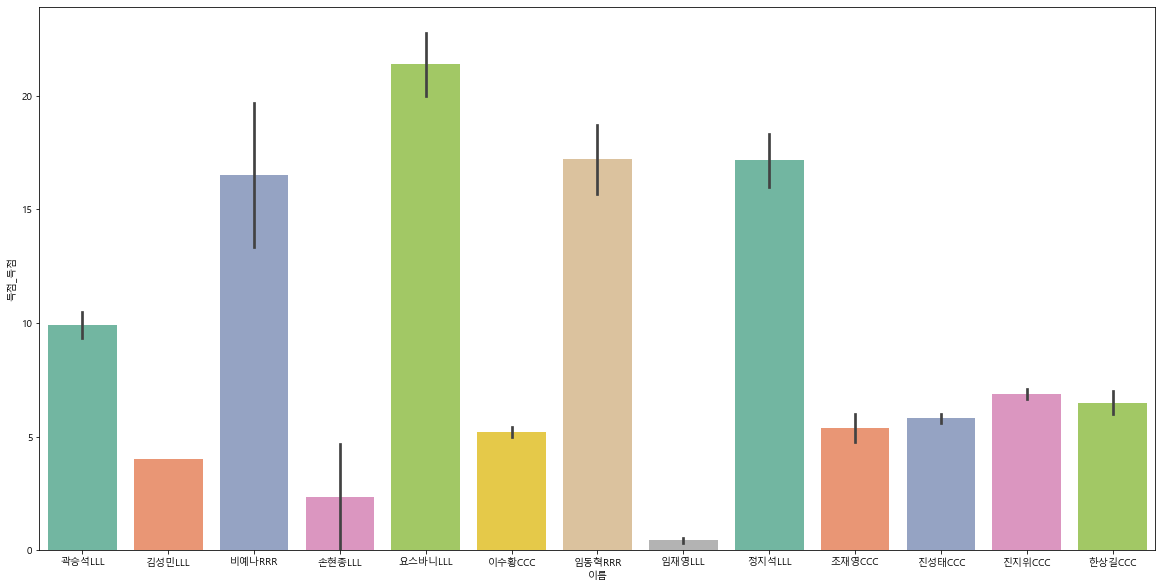

In [28]:
plt.figure(figsize=(20,10))
data=남배_선수20[남배_선수20["팀명"] == '대한항공']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

### 21시즌 승률 1등 대한항공 각 선수들 시각화

#### 21시즌 승률 1등 대한항공 각 선수들의 득점 수
- 링컨 선수가 득점수가 제일 높음.
- 링컨 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

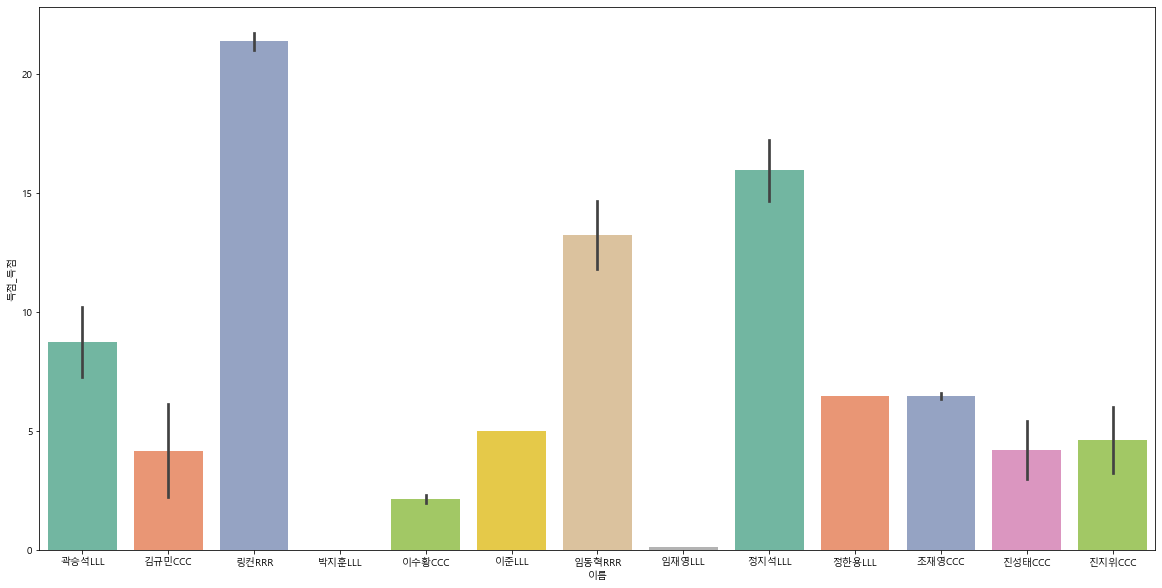

In [29]:
plt.figure(figsize=(20,10))
data=남배_선수21[남배_선수21["팀명"] == '대한항공']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

# 우리가 확인한 EDA 결과
## 각 승률 1등팀의 득점수와 공격성공률은 R포지션을 담당하는 용병(외국인선수)한테 많은 영향을 받음
### 20시즌 대한항공의 경우에는 R포지션의 용병선수와 L포지션의 용병선수의 득점수와 공격성공률이 높은것이 조금 예외였음. 20시즌에서는 R포지션 용병 보다 L포지션 용병에 포커싱을 한것으로 보임

# 여배, 남배 EDA 종합 결과
## 공격성공률, 승률에 영향을 미치는 제일 큰 요인은 용병선수의 기량에 따른다
## 보통 용병선수들은 R포지션을 많이 맡는다.
## L포지션도 맡는다. L,R 이 주 공격 포지션이기 때문